# Assignment 1: Data manipulation, visualization and features selection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
print(sklearn.__version__)

0.19.2


# Loading and cleaning data

In [3]:
breastcancer =  pd.read_csv("Data_BreastCancer.csv", sep = ',', header = 0)
fertility = pd.read_csv("Data_Fertility.csv", sep = ',', header  = 0)
mass = pd.read_csv("Data_MammographicMass.csv", sep = ',', header = 0)

attributes1 = ['Age','BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1','Classification']
attributes2 = ['Season','Age @ Analysis','Childish diseases', 'Accident or trauma', 'Surgical intervention', 'High fevers','Frequency of alcohol consumption','Smoking habit','Number of hours spent sitting per day','Diagnosis']
attributes3 = ['BI-RADS asses,emt','Age','Shape','Margin','Density','Severity(DX)']

dx_fertility=['N','O']

In [4]:
breastcancer

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,1
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083,1
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,1
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,1
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,1


In [5]:
fertility

,Season,Age @ Analysis,Childish diseases,Accident or trauma,Surgical intervention,High fevers,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
5,-0.33,0.67,1,0,1,0,0.8,0,0.50,N
6,-0.33,0.67,0,0,0,-1,0.8,-1,0.44,N
7,-0.33,1.00,1,1,1,0,0.6,-1,0.38,N
8,1.00,0.64,0,0,1,0,0.8,-1,0.25,N
9,1.00,0.61,1,0,0,0,1.0,-1,0.25,N


In [6]:
mass

,"BI-RADS assess,emt",Age,Shape,Margin,Density,Severity (DX)
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1
5,4,65,1,?,3,0
6,4,70,?,?,3,0
7,5,42,1,?,3,0
8,5,57,1,5,3,1
9,5,60,?,5,1,1


In [7]:
#Conversion of classifications and diagnosis into binary values
#For the 1st data set 1 was mapped into 0 and 2 into 1
#For the 2nd data set N was mapped into 0 and O into 1
#The 3rd data set was already binarized as 0 and 1
#For the 3 data sets 0 represents Healthy, Normal or Benign and 1 malignant or altered

breastcancer['Classification'] = breastcancer['Classification'].map({1:0,2:1})
fertility['Diagnosis'] = fertility['Diagnosis'].map({'O':1, 'N':0})

In [8]:
breastcancer

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,0
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083,0
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,0
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,0
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,0


In [9]:
#Looking for missing values and their location
breastcancer.apply(lambda x: x.isnull().sum())

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [10]:
#Looking for missing values and their location
fertility.apply(lambda x: x.isnull().sum())

Season                                   0
Age @ Analysis                           0
Childish diseases                        0
Accident or trauma                       0
Surgical intervention                    0
High fevers                              0
Frequency of alcohol consumption         0
Smoking habit                            0
Number of hours spent sitting per day    0
Diagnosis                                0
dtype: int64

In [11]:
#Looking for missing values, represented as "?", and their location
mass=mass.replace('?',np.NaN)
mass.apply(lambda x: x.isnull().sum())

BI-RADS assess,emt     2
Age                    5
Shape                 31
Margin                48
Density               76
Severity (DX)          0
dtype: int64

In [12]:
#Sesa, J. and Syed, D. median imputation to handle missing data
median1 = mass['BI-RADS assess,emt'].median()
median2 = mass['Age'].median()
median3 = mass['Shape'].median()
median4 = mass['Margin'].median()
median5 = mass['Density'].median()
median6 = mass['Severity (DX)'].median()

mass_copy = mass.copy()
#Median imputation
mass_copy['BI-RADS assess,emt'].fillna(median1, inplace = True)
mass_copy['Age'].fillna(median2, inplace = True)
mass_copy['Shape'].fillna(median3, inplace = True)
mass_copy['Margin'].fillna(median4, inplace = True)
mass_copy['Density'].fillna(median5, inplace = True)
mass_copy['Severity (DX)'].fillna(median6, inplace = True)

In [13]:
mass_copy

,"BI-RADS assess,emt",Age,Shape,Margin,Density,Severity (DX)
0,5,67,3,5,3,1
1,4,43,1,1,3,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,3,1
5,4,65,1,3,3,0
6,4,70,3,3,3,0
7,5,42,1,3,3,0
8,5,57,1,5,3,1
9,5,60,3,5,1,1


In [14]:
#Print the shape of each data set
print("Breast cancer data set shape:\n", breastcancer.shape)
print("Fertility data set shape:\n", fertility.shape)
print("Mammographic mass data set shape:\n", mass_copy.shape)

Breast cancer data set shape:
 (116, 10)
Fertility data set shape:
 (100, 10)
Mammographic mass data set shape:
 (961, 6)


In [15]:
#Print the data type of each column
print("Breast cancer data set data type:\n", breastcancer.dtypes)
print("Fertility data set data type:\n", fertility.dtypes)
print("Mammographic mass data set data type:\n", mass_copy.dtypes)

Breast cancer data set data type:
 Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object
Fertility data set data type:
 Season                                   float64
Age @ Analysis                           float64
Childish diseases                          int64
Accident or trauma                         int64
Surgical intervention                      int64
High fevers                                int64
Frequency of alcohol consumption         float64
Smoking habit                              int64
Number of hours spent sitting per day    float64
Diagnosis                                  int64
dtype: object
Mammographic mass data set data type:
 BI-RADS assess,emt    object
Age                   object
Shape                 object
Margin                object
D

In [16]:
#The 3rd data set has all the values as non numerical values(obj), therefore
#all values are transformed to int64
mass_copy['BI-RADS assess,emt'] = mass_copy['BI-RADS assess,emt'].astype('int64')
mass_copy['Age'] = mass_copy['Age'].astype('int64')
mass_copy['Shape'] = mass_copy['Shape'].astype('int64')
mass_copy['Margin'] = mass_copy['Margin'].astype('int64')
mass_copy['Density'] =mass_copy['Density'].astype('int64')

print("Mammographic mass data set data type:\n", mass_copy.dtypes)

Mammographic mass data set data type:
 BI-RADS assess,emt    int64
Age                   int64
Shape                 int64
Margin                int64
Density               int64
Severity (DX)         int64
dtype: object


In [17]:
#Analyse the number of instances of each class in each data set
print(breastcancer['Classification'].value_counts())
print(fertility['Diagnosis'].value_counts())
print(mass_copy['Severity (DX)'].value_counts())

1    64
0    52
Name: Classification, dtype: int64
0    88
1    12
Name: Diagnosis, dtype: int64
0    516
1    445
Name: Severity (DX), dtype: int64


# Data Visualization and Feature Selection

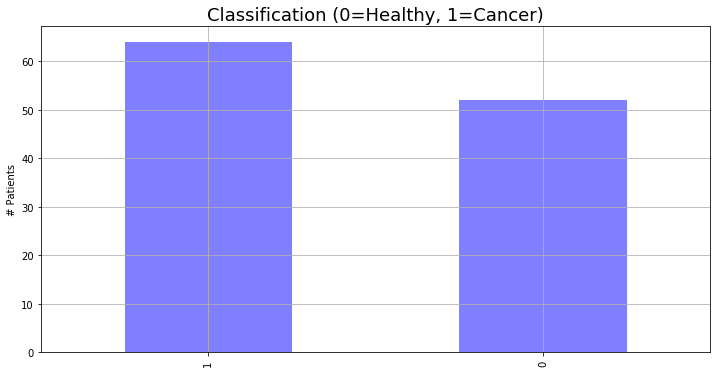

In [18]:
breastcancer.Classification.value_counts().plot(kind='bar', alpha=0.5, facecolor='b', figsize=(12,6))
plt.title("Classification (0=Healthy, 1=Cancer)", fontsize='18')
plt.ylabel("# Patients")
plt.grid(b=True)

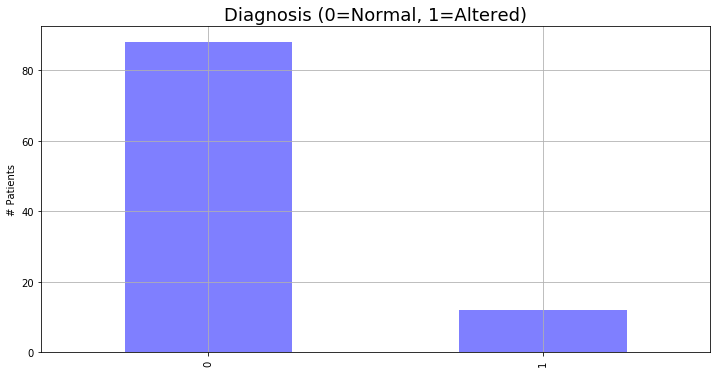

In [19]:
fertility.Diagnosis.value_counts().plot(kind='bar', alpha=0.5, facecolor='b', figsize=(12,6))
plt.title("Diagnosis (0=Normal, 1=Altered)", fontsize='18')
plt.ylabel("# Patients")
plt.grid(b=True)

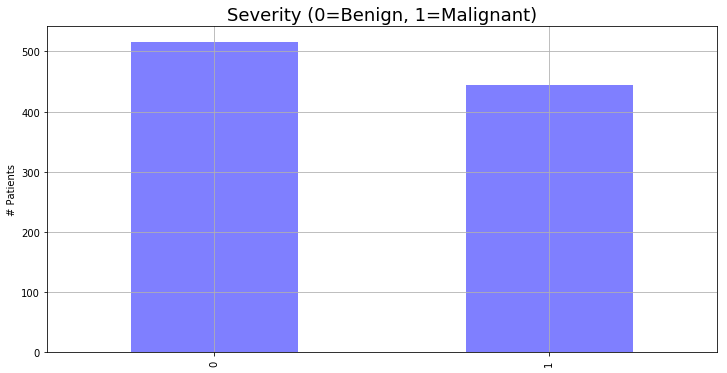

In [20]:
#rename the column, it had spaces
mass_copy.rename(columns={'Severity (DX)': 'Diagnosis'}, inplace=True)
#plot
mass_copy.Diagnosis.value_counts().plot(kind='bar', alpha=0.5, facecolor='b', figsize=(12,6))
plt.title("Severity (0=Benign, 1=Malignant)", fontsize='18')
plt.ylabel("# Patients")
plt.grid(b=True)

0    88
1    44
Name: Diagnosis, dtype: int64


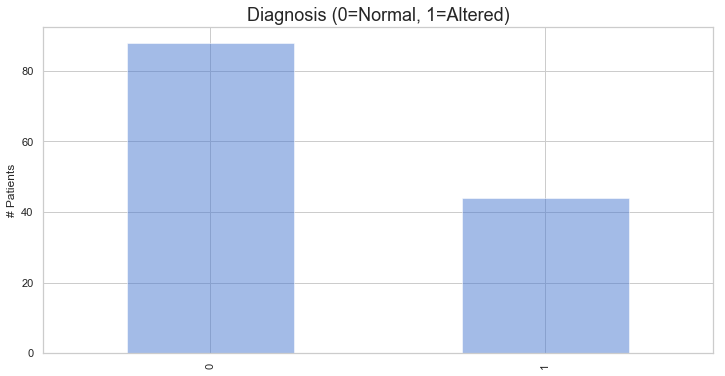

In [81]:
#The 1st and 3rd Data Sets have enough information for every class; nevertheless,
#the 2nd data set is an example of class imbalance. Therefore, an upsampling method
#has been used to generate more random samples for the '1' class. Gain of information
#instead of losing of information (Downsampling), Mainly because the data set is small.
from sklearn.utils import resample
#Splitting the majority and minority classes
fertility_more = fertility[fertility.Diagnosis==0]
fertility_less = fertility[fertility.Diagnosis==1]

#Resampling up to the same number of instances of '0'
fertility_min_upsample = resample(fertility_less, replace=True, n_samples=44, random_state=10)

#Combine the upsampled minority with the majority
fertilitynew = pd.concat([fertility_more, fertility_min_upsample])

#Count of each instance
print(fertilitynew.Diagnosis.value_counts())

fertilitynew.Diagnosis.value_counts().plot(kind='bar', alpha=0.5, facecolor='b', figsize=(12,6))
plt.title("Diagnosis (0=Normal, 1=Altered)", fontsize='18')
plt.ylabel("# Patients")
plt.grid(b=True)

In [82]:
#New fertility data set
fertilitynew

,Season,Age @ Analysis,Childish diseases,Accident or trauma,Surgical intervention,High fevers,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
5,-0.33,0.67,1,0,1,0,0.8,0,0.50,0
6,-0.33,0.67,0,0,0,-1,0.8,-1,0.44,0
7,-0.33,1.00,1,1,1,0,0.6,-1,0.38,0
8,1.00,0.64,0,0,1,0,0.8,-1,0.25,0
9,1.00,0.61,1,0,0,0,1.0,-1,0.25,0
10,1.00,0.67,1,1,0,-1,0.8,0,0.31,0
11,1.00,0.78,1,1,1,0,0.6,0,0.13,0


In [42]:
breastcancer.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,0.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,0.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,0.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,1.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,1.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,1.000000


In [48]:
fertilitynew.describe()

,Season,Age @ Analysis,Childish diseases,Accident or trauma,Surgical intervention,High fevers,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,-0.003939,0.671970,0.840909,0.416667,0.530303,0.106061,0.810606,-0.325758,0.428864,0.333333
std,0.791637,0.120416,0.367154,0.494885,0.500982,0.595884,0.162639,0.786297,0.195755,0.473200
min,-1.000000,0.500000,0.000000,0.000000,0.000000,-1.000000,0.200000,-1.000000,0.060000,0.000000
25%,-0.330000,0.560000,1.000000,0.000000,0.000000,0.000000,0.750000,-1.000000,0.250000,0.000000
50%,-0.330000,0.670000,1.000000,0.000000,1.000000,0.000000,0.800000,-1.000000,0.410000,0.000000
75%,1.000000,0.750000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
mass_copy.describe()

,"BI-RADS assess,emt",Age,Shape,Margin,Density,Diagnosis
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,4.347555,55.495317,2.730489,2.806452,2.917794,0.463059
std,1.781244,14.442783,1.223552,1.527525,0.365869,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [26]:
#Random forest do not require standarization modification.

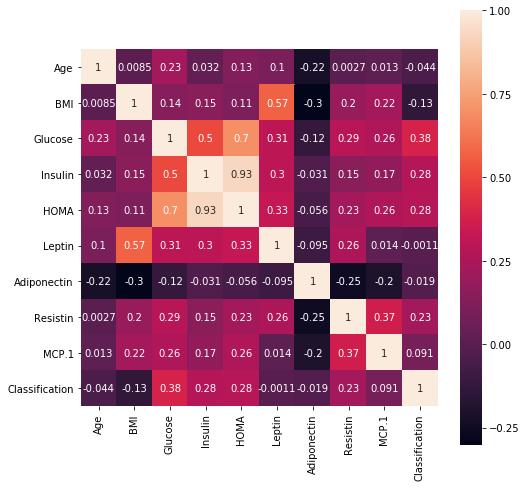

In [29]:
#1st heatmap
att1 = breastcancer[['Age','BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1','Classification']]

plt.figure(figsize=(8,8))
h1 = sns.heatmap(att1.corr(), vmax=1, square=True, annot=True)

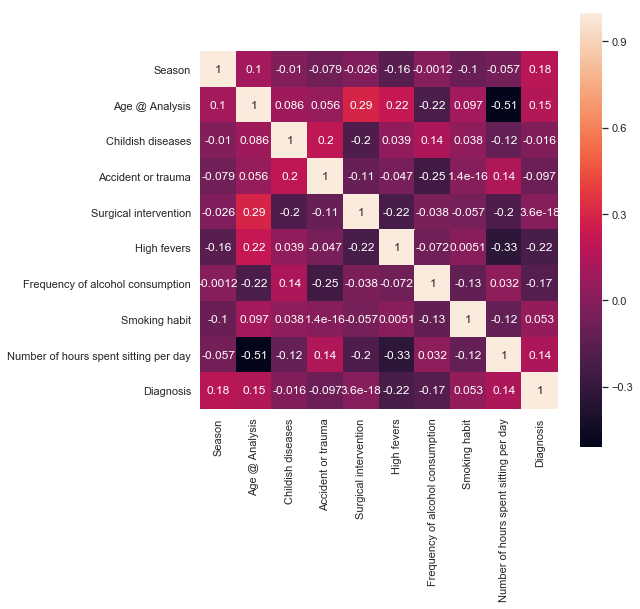

In [86]:
att2 = fertilitynew[['Season','Age @ Analysis','Childish diseases', 'Accident or trauma','Surgical intervention', 'High fevers','Frequency of alcohol consumption','Smoking habit','Number of hours spent sitting per day','Diagnosis']]

plt.figure(figsize=(8,8))
h2 = sns.heatmap(att2.corr(), vmax=1, square=True, annot=True)

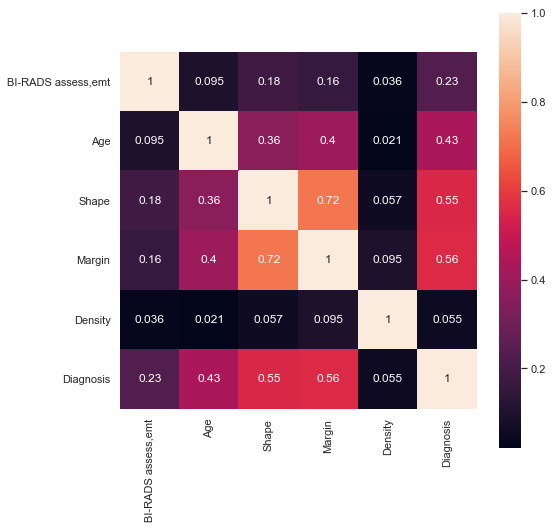

In [53]:
att3 = mass_copy[['BI-RADS assess,emt','Age','Shape','Margin','Density','Diagnosis']]

plt.figure(figsize=(8,8))
h3 = sns.heatmap(att3.corr(), vmax=1, square=True, annot=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

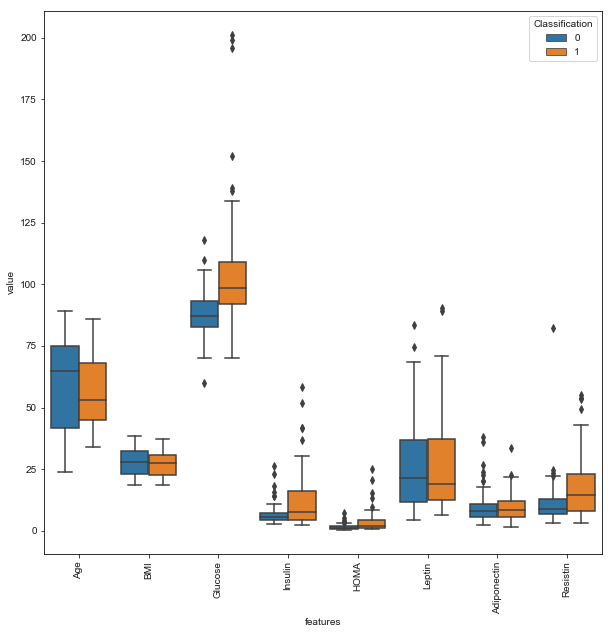

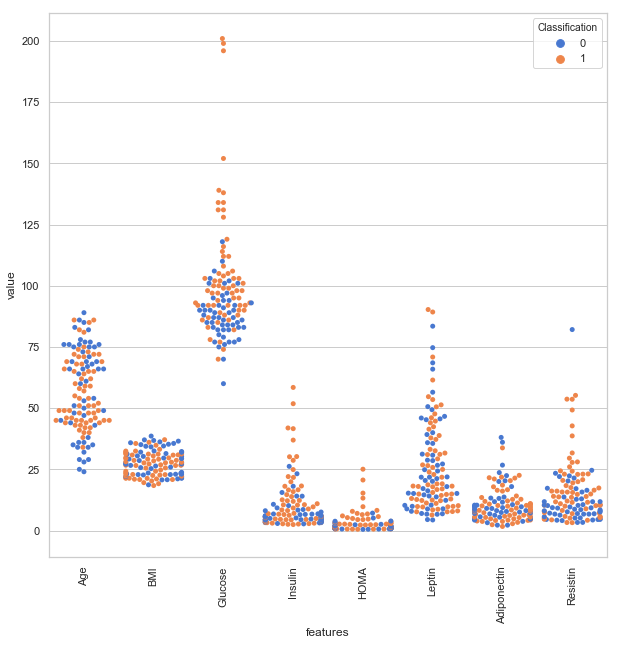

In [35]:
y1=breastcancer.Classification
list=['Classification','MCP.1']
x1=breastcancer.drop(list, axis=1)

data = pd.concat([y1, x1], axis=1)
data = pd.melt(data, id_vars='Classification', var_name='features', value_name='value')

plt.figure(figsize=(10,10))
sns.boxplot(x='features', y='value', hue="Classification", data=data)
plt.xticks(rotation=90)

sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="Classification", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

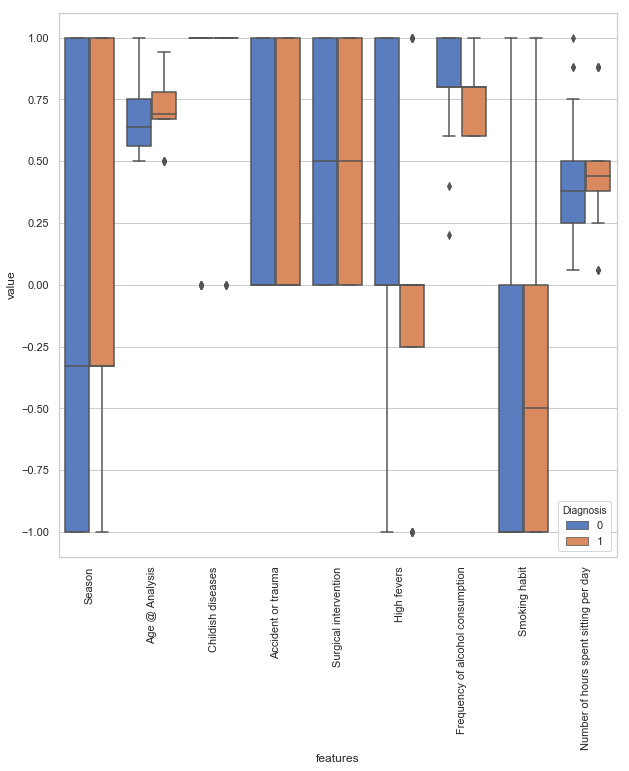

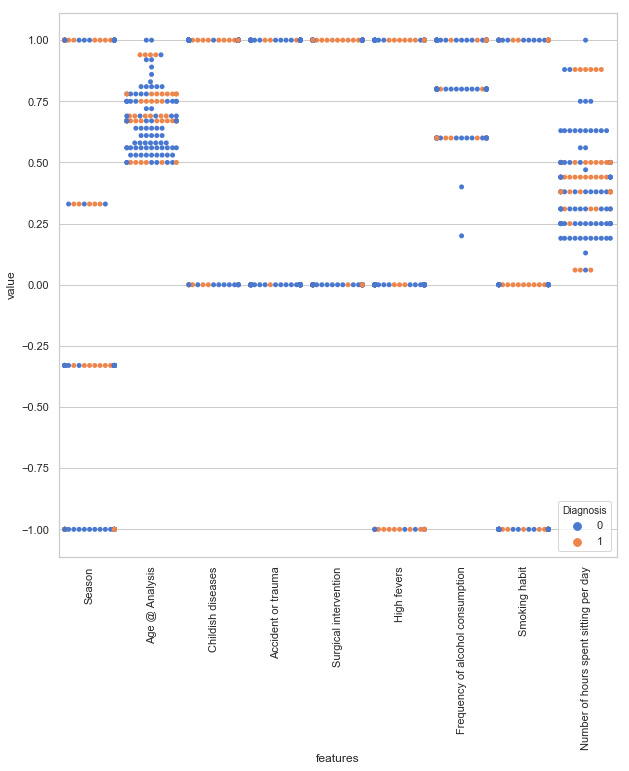

In [84]:
y2=fertilitynew.Diagnosis
x2=fertilitynew.drop('Diagnosis', axis=1)

data2 = pd.concat([y2, x2], axis=1)
data2 = pd.melt(data2, id_vars='Diagnosis', var_name='features', value_name='value')

plt.figure(figsize=(10,10))
sns.boxplot(x='features', y='value', hue="Diagnosis", data=data2)
plt.xticks(rotation=90)

sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="Diagnosis", data=data2)
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

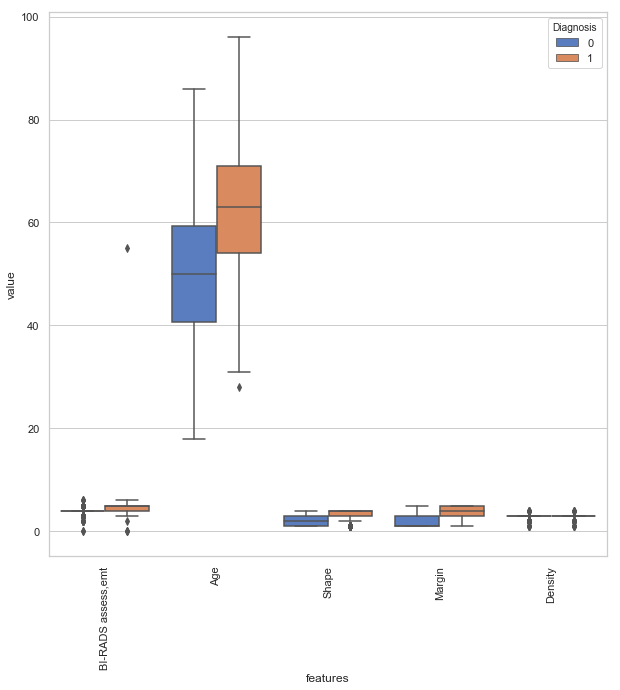

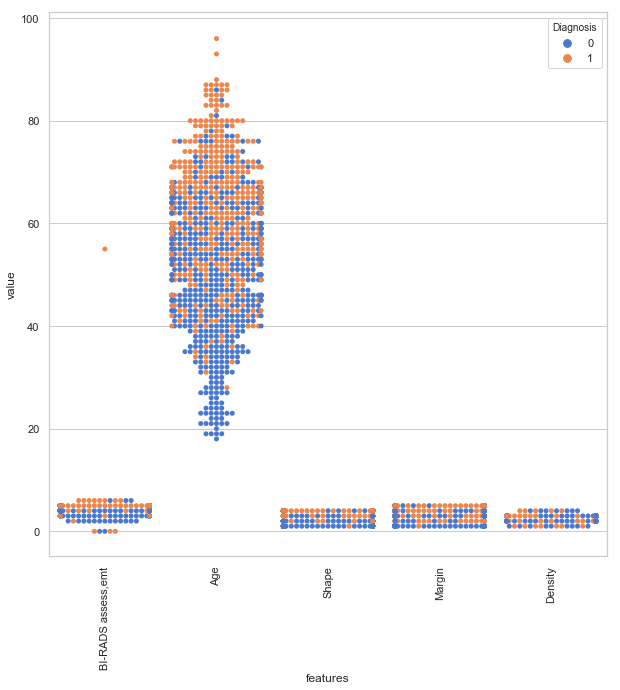

In [56]:
y3=mass_copy.Diagnosis
x3=mass_copy.drop('Diagnosis', axis=1)

data3 = pd.concat([y3, x3], axis=1)
data3 = pd.melt(data3, id_vars='Diagnosis', var_name='features', value_name='value')

plt.figure(figsize=(10,10))
sns.boxplot(x='features', y='value', hue="Diagnosis", data=data3)
plt.xticks(rotation=90)

sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="Diagnosis", data=data3)
plt.xticks(rotation=90)

In [92]:
set1cancer = breastcancer.drop(['HOMA', 'Glucose'], axis=1)
set2fertility = fertilitynew
mass_copy.rename(columns={'BI-RADS assess,emt': 'BI-RADS'}, inplace=True)
set3mass = mass_copy.drop(['Margin'], axis=1)

In [94]:
set1cancer

,Age,BMI,Insulin,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,2.707,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,3.115,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,4.498,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,3.226,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,3.549,6.6994,4.819240,10.57635,773.920,0
5,49,22.854458,3.226,6.8317,13.679750,10.31760,530.410,0
6,89,22.700000,4.690,6.9640,5.589865,12.93610,1256.083,0
7,76,23.800000,6.470,4.3110,13.251320,5.10420,280.694,0
8,73,22.000000,3.350,4.4700,10.358725,6.28445,136.855,0
9,75,23.000000,4.952,17.1270,11.578990,7.09130,318.302,0


In [95]:
set2fertility

,Season,Age @ Analysis,Childish diseases,Accident or trauma,Surgical intervention,High fevers,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
5,-0.33,0.67,1,0,1,0,0.8,0,0.50,0
6,-0.33,0.67,0,0,0,-1,0.8,-1,0.44,0
7,-0.33,1.00,1,1,1,0,0.6,-1,0.38,0
8,1.00,0.64,0,0,1,0,0.8,-1,0.25,0
9,1.00,0.61,1,0,0,0,1.0,-1,0.25,0
10,1.00,0.67,1,1,0,-1,0.8,0,0.31,0
11,1.00,0.78,1,1,1,0,0.6,0,0.13,0


In [96]:
set3mass

,BI-RADS,Age,Shape,Density,Diagnosis
0,5,67,3,3,1
1,4,43,1,3,1
2,5,58,4,3,1
3,4,28,1,3,0
4,5,74,1,3,1
5,4,65,1,3,0
6,4,70,3,3,0
7,5,42,1,3,0
8,5,57,1,3,1
9,5,60,3,1,1


# Export cleaned and filtered data into a CSV file

In [98]:
set1cancer.to_csv('dataset1_clean.csv')
set2fertility.to_csv('dataset2_clean.csv')
set3mass.to_csv('dataset3_clean.csv')